In [251]:
import pandas as pd
import numpy as np
import easygui
import scipy.optimize
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

import kin
import trmc

mpl.rc('font',**{'size' : 14})

class exp_formatter(): 
    """used to format exponentials of ticks"""
    def __init__(self,exponent):
        self.exponent = exponent
    
    def format_func(self,value, tick_number):
        return ("{:0=1.0f}").format(value/10**self.exponent)
#         return ("{:0=1.0f}e" + str(self.exponent)).format(value/10**self.exponent)

defaultpath = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel'

labels = {'A': 'Sample A (0.00% Bi)','B': 'Sample B (0.01% Bi)','K': 'Sample K','Cs': 'Sample Cs', 'N' : 'Sample N' }

# Fitting of cavity data

[8.59436291e+09 1.55880653e+07 6.54914407e-01]
[8.55905904e+09 2.86652283e+07 6.71691580e-01]
[8.54833693e+09 2.17791871e+07 5.68628896e-01]
[8.55992723e+09 2.11368010e+07 5.69878697e-01]


(8420000000.0, 8652000000.0)

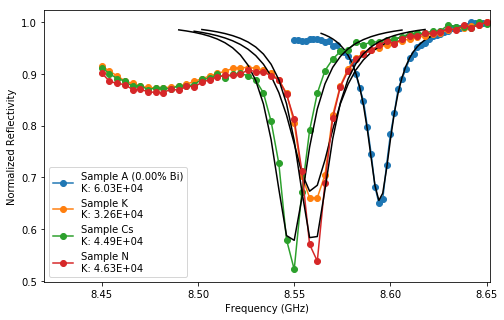

In [205]:
fp_sw_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Sweep_exp.csv'
fp_sw_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Sweep_exp.csv'
fp_sw_K = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Sweep_exp.csv'
fp_sw_Cs = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Sweep_exp.csv'
fp_sw_N = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Sweep_exp.csv'

fps = {'A': fp_sw_A,'B': fp_sw_B,'K': fp_sw_K,'Cs': fp_sw_Cs,'N': fp_sw_N }
# del fps['A']
del fps['B']

swps = []
maxV = {}
for samp in fps:
    df = pd.read_csv(fps[samp], index_col = 0)
    swps.append(df['Experimental R'])
    maxV[samp] = 0.012#df[' Vsignal(V)'].max()

swps = dict(zip(fps.keys(),swps))

back_V_fit = {} #Forgot to copy values sometimes, so using the Vsignal max value and R0 to estimate background voltage
K = {}

fig, ax = plt.subplots(1,figsize = (8,5))
for sample in swps:
    sweep = swps[sample]
    xdata = sweep.index.values
    ydata = sweep.values
    
    minidx = ydata.argmin()
    minfreq = xdata[minidx]
    

    p0 =[minfreq,1e7,.5]
    bounds = ([0,0,0],[np.inf,np.inf,np.inf])
    window = 15
    sl = slice(minidx-window,minidx+window)
    popt,popc = scipy.optimize.curve_fit(trmc.lor,xdata[sl],ydata[sl], p0 , bounds = bounds)
    fit_func = trmc.lor(xdata,*popt)
    print(popt)

    K[sample] = trmc.calc_K(f0 = popt[0], w = popt[1], R0 = popt[2], printparams = False)
    back_V_fit[sample] = -maxV[sample]*popt[2]
    
    ax.plot(sweep, marker = 'o', label = (labels[sample] + "\nK: " + str("{:0.2E}".format(K[sample]))))
    ax.plot(xdata[sl],fit_func[sl] , color = 'black')
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Normalized Reflectivity')
ax.legend()
ax.xaxis.get_offset_text().set_visible(False)
ax.set_xlim(8.42e9,8.652e9)

# Pull in and plot trmc data

In [249]:

fp_A = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=01_Fluence=6.45E+14_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=02_Fluence=5.121E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=03_Fluence=4.07E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=04_Fluence=3.231E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=05_Fluence=2.567E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=06_Fluence=2.038E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=07_Fluence=1.619E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=08_Fluence=6.45E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=09_Fluence=3.231E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=10_Fluence=6.45E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample A\\Data\\High_Power_Filter=11_Fluence=6.45E+11_data.csv']
fp_B = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=01_Fluence=4.573E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=02_Fluence=3.631E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=03_Fluence=2.886E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=04_Fluence=2.291E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=05_Fluence=1.82E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=06_Fluence=1.445E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=07_Fluence=1.148E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=08_Fluence=4.573E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=09_Fluence=2.291E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=10_Fluence=4.573E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=11_Fluence=4.573E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Sample B\\Data\\High_Power_Filter=12_Fluence=4.573E+10_data.csv']
fp_K = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample K\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
fp_Cs = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample Cs\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
fp_N = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=01_Fluence=2.89E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=02_Fluence=2.295E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=03_Fluence=2.89E+09_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=04_Fluence=1.448E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=05_Fluence=2.89E+08_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=06_Fluence=9.132E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=07_Fluence=7.259E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=08_Fluence=2.89E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=09_Fluence=1.448E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=10_Fluence=2.89E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=11_Fluence=2.89E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Sample N\\Fluence Sweep\\High_Power_Filter=12_Fluence=2.89E+10_data.csv']
#fp_N = easygui.fileopenbox(default=defaultpath,multiple=True)

fps = {'A': fp_A,'B': fp_B,'K': fp_K,'Cs': fp_Cs,'N': fp_N }

del fps['B']

In [211]:
def remove_low_pow(df,num):
    df = df.copy()
    columns = df.columns.sort_values()[0:num]
    for column in columns:
        del df[column]
    return df




In [263]:
dfs_V = {}

for samp in fps:
    dfs_V[samp], back_V_csv = trmc.load(fps[samp], offsettime = 50e-9, sub_lowpow = True) 
    dfs_V[samp] = trmc.offsettime(dfs_V[samp], timebefore = 100e-9, timeafter = 500-9)
    dfs_V[samp] = dfs_V[samp][dfs_V[samp].columns.sort_values()]

    
dfs_V['N'] = remove_low_pow(dfs_V['N'],2)
dfs_V['Cs'] = remove_low_pow(dfs_V['Cs'],2)
dfs_V['K'] = remove_low_pow(dfs_V['K'],2)

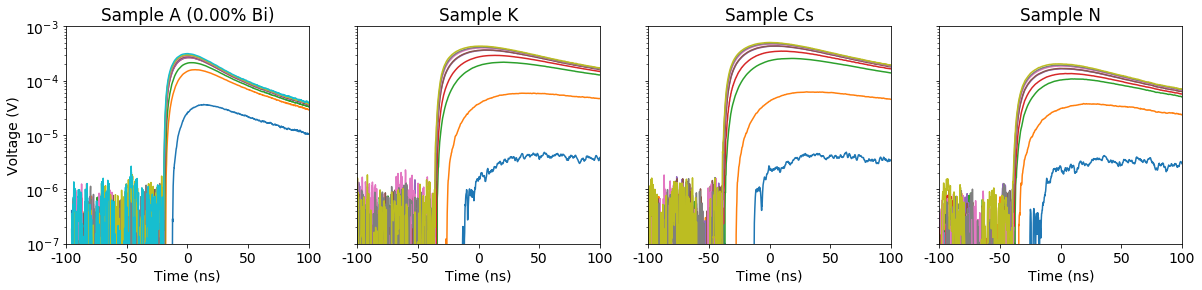

In [264]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

insets = [0,0,0,0,0]

for i, sample in enumerate(dfs_V):
    axes[i].plot(dfs_V[sample])
    axes[i].set_title(labels[sample])
    axes[i].set_xlim(-200e-9,1.5e-6)
    
    left, bottom, width, height = [0.035+ 0.202*(i+1), 0.62, 0.05, 0.2]
#     insets[i] = fig.add_axes([left, bottom, width, height])
#     insets[i].plot(np.flip(dfs_V[sample].columns,0), marker = 'o')
#     insets[i].set_ylim(2e11,1e15)
#     insets[i].set_yscale('log')
#     insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
#     insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-7,1e-3)
# axes[0].set_ylim(-1e-5,1e-5)

axes[0].set_ylabel('Voltage (V)')

for ax in axes:
    ax.set_xlim(-1e-7,1e-7)
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

In [268]:
dfs_cond = {}

for samp in fps:
    print('Background V of', samp, ": " ,"{:0.3f}".format(back_V_fit[samp]))
#     print('K of ', samp, ": " ,K[samp])
    dfs_cond[samp] = trmc.convert_V2cond(dfs_V[samp],back_V_fit[samp],K[samp])

Background V of A :  -0.008
Background V of K :  -0.008
Background V of Cs :  -0.007
Background V of N :  -0.007


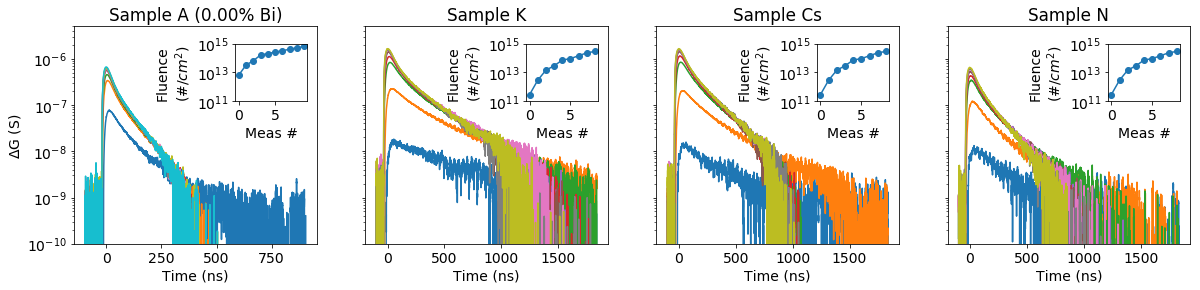

In [270]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

for i, sample in enumerate(dfs_cond):
    axes[i].plot(dfs_cond[sample])
    axes[i].set_title(labels[sample])
    
    left, bottom, width, height = [0.035+ 0.202*(i+1), 0.62, 0.05, 0.2]
    insets[i] = fig.add_axes([left, bottom, width, height])
    insets[i].plot(dfs_V[sample].columns, marker = 'o')
    insets[i].set_ylim(1e11,1e15)
    insets[i].set_yscale('log')
    insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
    insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-10,5e-6)
axes[0].set_ylabel('$\Delta$G (S)')


for ax in axes:
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

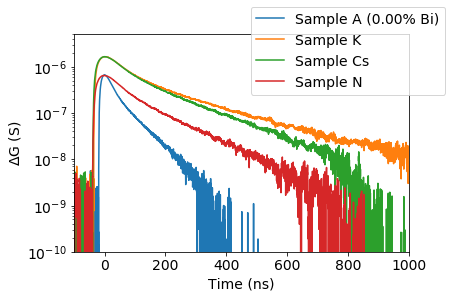

In [281]:
fig, ax= plt.subplots()

insets = [0,0,0,0,0]

for i, sample in enumerate(dfs_cond):
    dfs = dfs_cond[sample]
    ax.plot(dfs[dfs.columns[-1]], label = labels[sample])


ax.set_yscale('log')
ax.set_ylim(1e-10,5e-6)
ax.set_xlim(-100e-9,1e-6)
ax.set_ylabel('$\Delta$G (S)')


ax.set_xlabel('Time (ns)')
expf = exp_formatter(-9)
ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
ax.xaxis.get_offset_text().set_visible(False)


fig.legend()

# Pull in and plot transmission data

In [231]:
# filepath = easygui.fileopenbox(default=defaultpath)
fp_T_quartz = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Absorption\\Quartz.txt'
quartz = pd.read_csv(fp_T_quartz, skiprows = 2,index_col = 0, squeeze=True)/100

# # fp_T_data = easygui.fileopenbox(default=defaultpath)
fp_T_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Absorption\\SampleA_remres.txt'
fp_T_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 1\\Absorption\\SampleB_remres.txt'

fp_T_K = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Absorption\\Sample_K.txt'
fp_T_Cs = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Absorption\\Sample_Cs.txt'
fp_T_N = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Sample Set 2\\Absorption\\Sample_N.txt'

fps = {'A': fp_T_A,'B': fp_T_B,'K': fp_T_K,'Cs': fp_T_Cs,'N': fp_T_N }

del fps['B']

T = pd.DataFrame(columns = fps.keys())
for samp in fps:
    T[samp] = pd.read_csv(fps[samp], skiprows = 2,index_col = 0,squeeze = True)/100

Transmittance  A :  0.0011550265656110087
Transmittance  K :  0.0169623901349731
Transmittance  Cs :  0.008580197344538923
Transmittance  N :  0.01580736356936209


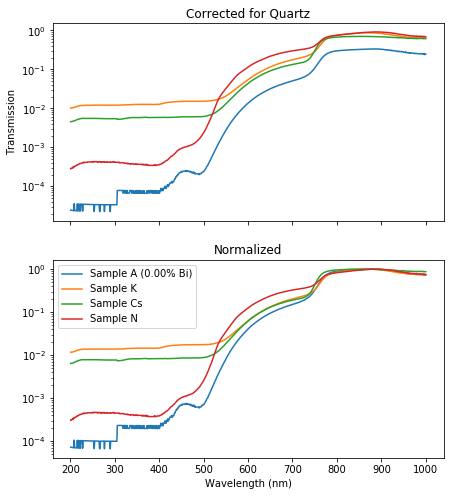

In [232]:
#Correct for quartz
T_corr = T.copy()
for samp in T_corr:
    T_corr[samp] = T[samp]/quartz
    
#normalize to maximum value    
T_norm = T_corr.copy()
for samp in T_norm:
    T_norm[samp] = T_corr[samp]/T_norm[samp].max()

fig, axes = plt.subplots(2,1, figsize = (7,8), sharex = True)

for samp in T.columns:
#     axes[0].plot(T[samp], label = samp)
    axes[0].plot(T_corr[samp], label = labels[samp])
    axes[1].plot(T_norm[samp], label = labels[samp])
    print("Transmittance ", samp, ': ', str(T_corr[samp][532.0]))

# axes[0].plot(quartz, label = 'Quartz')
# axes[0].set_title('Raw Data')
axes[0].set_title('Corrected for Quartz')
axes[1].set_title('Normalized')

axes[0].set_ylabel('Transmission')
axes[1].legend()
axes[1].set_xlabel('Wavelength (nm)')

for ax in axes:
    
    ax.set_yscale('log')

Absorbance  A :  0.9988449734343889
Absorbance  K :  0.9830376098650269
Absorbance  Cs :  0.991419802655461
Absorbance  N :  0.9841926364306379


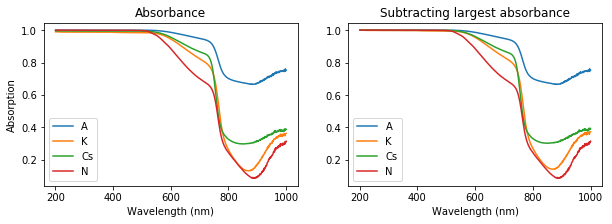

In [233]:
#Absorbance
A = T_corr.copy()
for samp in T_corr:
    A[samp] = 1-T_corr[samp]
    
#subtraced absorbance
A_sub = A.copy()
for samp in A:
    A_sub[samp] = A[samp]-(A[samp].max()-1)


fig, axes = plt.subplots(1,2, figsize = (10,3))

FAs = {}

for samp in T.columns:
    axes[0].plot(A[samp], label = samp)
    axes[1].plot(A_sub[samp], label = samp)
    FAs[samp] = A[samp][532.0]
    print("Absorbance ", samp, ': ', str(FAs[samp]))

# axes[0].plot(quartz, label = 'Quartz')
axes[0].set_title('Absorbance')
axes[1].set_title('Subtracting largest absorbance')
# axes[2].set_title('Corrected and Normalized to max')
    
axes[0].set_ylabel('Absorption')
for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.legend()
#     ax.set_yscale('log')

# calculate figure of merit

In [234]:
params = {
    'beta' : 2.25
}

cav_A = 22.86*10.16 ##mm^2

# FAs = {'A': 1,'B': 0.87,'K': 1,'C2': 1,'N': 1}
masking = {'A': 0.215,'B': 0.25,'K': 0.25,'Cs': 0.25,'N': 0.25}
print('Masking Factors')
for sample in masking:
    print('Sample ', sample, ": ", "{:0.3f}".format(masking[sample]))
print('Fractional Absorbance')
for sample in FAs:
    print('Sample ', sample, ": ", "{:0.3f}".format(FAs[sample]))

Masking Factors
Sample  A :  0.250
Sample  B :  0.250
Sample  K :  0.250
Sample  Cs :  0.250
Sample  N :  0.250
Fractional Absorbance
Sample  A :  0.999
Sample  K :  0.983
Sample  Cs :  0.991
Sample  N :  0.984


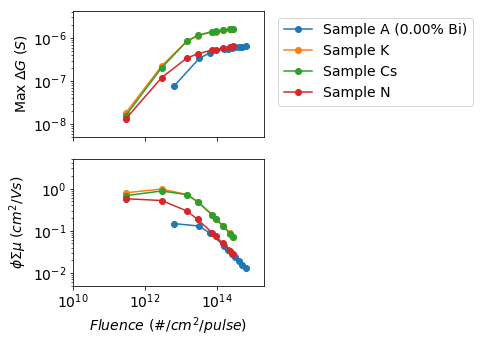

In [277]:
fig, axes = plt.subplots(2,1, sharex = True, figsize = (7,5))

maxmob = pd.Series(index = dfs_cond.keys())

for i,sample in enumerate(dfs_cond):
    df = dfs_cond[sample]
    params['M'] = masking[sample]
    params['FA'] = FAs[sample]
    maxG, fom = trmc.maxG_and_fom(df,params)
    fom = fom.sort_index()
    maxG = maxG.sort_index()
    maxmob[sample] = fom.max()
    
    axes[0].plot(maxG,marker = 'o', label = labels[sample])    
    axes[1].plot(fom,marker = 'o', label = labels[sample])

axes[0].set_ylabel('Max $\Delta G \ (S)$')
axes[1].set_xlim(1e10,2e15)
axes[1].set_ylabel('$\phi\Sigma\mu \ (cm^2/Vs)$')
axes[1].set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')
axes[1].set_ylim(5e-3,5e0)
axes[0].legend(bbox_to_anchor=(1.04,1), loc="upper left")

for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.margins(0.2)
    
fig.tight_layout()

# half-life calculation

In [236]:
def offsettime_series(series, timebefore = 0, timeafter = None):
    """remove all data 'timebefore' before the max of the dataframe, then move the max to zero time"""
    timemax = series.idxmax()
        
    time = series.index
    time1 = timemax-timebefore
    idx1 = time.get_loc(time1, method = 'nearest')

    if timeafter is None:
        idx2 = -1
    else:
        time2 = timemax+timeafter
        idx2 = time.get_loc(time2, method = 'nearest')

    series_cut = series.iloc[idx1:idx2]
#     series_cut = series_cut.reindex(time[idx1:idx2] - timemax)
    return series_cut

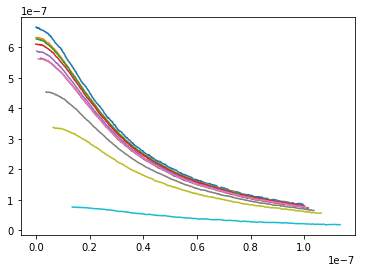

In [237]:
sers_hl = {}
# sample = 'A'

# from matplotlib.ticker.ScalarFormatter import ScalarFormatter
dfs_cond_cut = dfs_cond#{'A':dfs_cond['A']}
for i, sample in enumerate(dfs_cond_cut):
    fluences = dfs_cond_cut[sample].columns
    t_hls = []
    for fluence in fluences:
        series = offsettime_series(dfs_cond_cut[sample][fluence])
        times = series.index
        ser_max = series.max()
        time_max = abs(series - ser_max).idxmin()
        time_half = abs(series - ser_max/2).idxmin()
        t_hls.append(time_half-time_max)
        
        if sample == 'A':
            plt.plot(series.iloc[0:1000])
    sers_hl[sample] = pd.Series(t_hls, index = fluences).sort_index()
    
# plt.yscale('log')    
# t_hls
# plt.plot(df[df.columns[-1]])

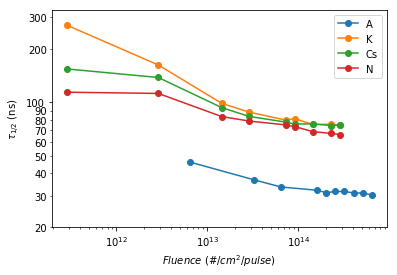

In [239]:
fig, ax = plt.subplots()

for sample in sers_hl:
    scaled_data = sers_hl[sample]
    ax.plot(scaled_data, label = sample, marker = 'o')

ax.set_yscale('log')

ax.set_xscale('log')

ax.set_ylabel('$\\tau_{1/2}$ (ns)')
ax.set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')

# ax.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
# ax.yaxis.set_minor_formatter(FuncFormatter(lambda y, _: '{:.2e}'.format(y/1e-9))) 

expf = exp_formatter(-9)
ax.yaxis.set_minor_formatter(FuncFormatter(expf.format_func))
ax.yaxis.set_major_formatter(FuncFormatter(expf.format_func))
ax.yaxis.get_offset_text().set_visible(False)

ax.set_ylim(20e-9,330e-9)

ax.legend()